In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import chess

labels = np.zeros(64)
piece_to_gray = [0.0,1.0,0.8,0.6,0.5,0.4,0.2,-1.0,-0.8,-0.6,-0.5, -0.4,-0.2]
labels[4]=9
labels[6]=7
labels[10]=8
labels[11]=9
labels[13]=12
labels[14]=10
labels[15]=12
labels[16]=12
labels[19]=12
labels[20]=11
labels[21]=11
labels[22]=12
labels[25]=12
labels[33]=6
labels[44]=6
labels[45]=4
labels[47]=6
labels[48]=6
labels[49]=4
labels[50]=2
labels[51]=5
labels[53]=6
labels[54]=6
labels[59]=3
labels[60]=3
labels[62]=1
labels

array([ 0.,  0.,  0.,  0.,  9.,  0.,  7.,  0.,  0.,  0.,  8.,  9.,  0.,
       12., 10., 12., 12.,  0.,  0., 12., 11., 11., 12.,  0.,  0., 12.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  6.,  4.,  0.,  6.,  6.,  4.,  2.,  5.,
        0.,  6.,  6.,  0.,  0.,  0.,  0.,  3.,  3.,  0.,  1.,  0.])

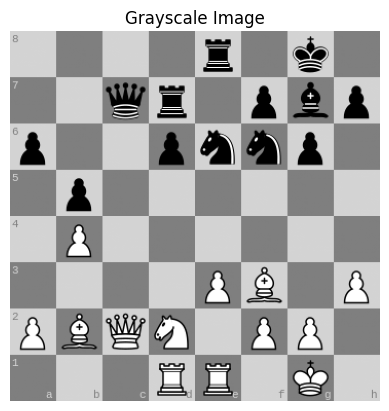

In [3]:
import cv2
import matplotlib.pyplot as plt

# Load the image
image = cv2.imread("E:\\train\\11161.png")

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Display using matplotlib (Note: OpenCV loads in BGR, but matplotlib expects RGB)
plt.imshow(gray, cmap='gray')  # Use the 'gray' colormap for grayscale images
plt.title('Grayscale Image')
plt.axis('off')  # Hide axes
plt.show()



In [4]:
import tensorflow as tf
print(tf.__version__)


2.18.0


In [5]:
import cv2
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define the mapping of pieces to their grayscale values
piece_to_gray_weights = {'K': 1.0, 'Q': 0.8, 'R': 0.6, 'B': 0.5, 'N': 0.4, 'P': 0.2, 
                 'k': -1.0, 'q': -0.8, 'r': -0.6, 'b': -0.5, 'n': -0.4, 'p': -0.2, '.': 0.0}

# Step 1: Preprocessing (Chessboard Alignment & Grid Extraction)
def preprocess_chessboard(image_path):
    # Read the image
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Resize to standard chessboard size (512x512 pixels)
    gray = cv2.resize(gray, (512, 512))
    
    # Divide the board into 64 cells (8x8 grid)
    cells = [gray[y:y+64, x:x+64] for y in range(0, 512, 64) for x in range(0, 512, 64)]
    return cells

# Step 2: Model Definition
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(13, activation='softmax')  # Output a single grayscale value for each cell
    ])
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

# Step 3: Training the Model
def train_model(cells, labels):
    # Normalize and reshape the cells for the model
    X = np.array(cells).reshape(-1, 64, 64, 1) / 255.0  # Normalize to [0, 1]
    y = np.array(labels)
    
    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Create and train the model
    model = create_model()
    model.fit(X_train, y_train, epochs=30, validation_data=(X_test, y_test))
    return model

In [6]:
image_path = "E:\\train\\11161.png"
    
# Preprocess the image to extract cells
cells = preprocess_chessboard(image_path)

# Labels (example provided in the question)
labels = np.array([ 0.,  0.,  0.,  0.,  9.,  0.,  7.,  0.,  0.,  0.,  8.,  9.,  0.,
       12., 10., 12., 12.,  0.,  0., 12., 11., 11., 12.,  0.,  0., 12.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  6.,  4.,  0.,  6.,  6.,  4.,  2.,  5.,
        0.,  6.,  6.,  0.,  0.,  0.,  0.,  3.,  3.,  0.,  1.,  0.])

# Train the model
model = train_model(cells, labels)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 394ms/step - accuracy: 0.1673 - loss: 2.4448 - val_accuracy: 0.7692 - val_loss: 1.0196
Epoch 2/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.5639 - loss: 1.8541 - val_accuracy: 0.0769 - val_loss: 1.3739
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.1174 - loss: 1.8519 - val_accuracy: 0.8462 - val_loss: 1.0289
Epoch 4/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.6136 - loss: 1.4590 - val_accuracy: 0.7692 - val_loss: 0.6218
Epoch 5/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.5874 - loss: 1.2408 - val_accuracy: 0.9231 - val_loss: 0.5545
Epoch 6/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.7155 - loss: 1.1365 - val_accuracy: 1.0000 - val_loss: 0.5326
Epoch 7/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.8225 - loss: 0.9042 - val_accuracy: 1.0000 - val_loss: 0.2216
Epoch 8/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step - accuracy: 0.8068 - loss: 0.6240 - val_accuracy: 1.0000 - val_loss:

In [7]:
# Step 4: Inference
def predict_board(model, cells):
    # Normalize and reshape cells for prediction
    X = np.array(cells).reshape(-1, 64, 64, 1) / 255.0
    predictions = model.predict(X)
    return predictions

In [8]:
# Preprocess the image to extract cells
def convert_image(image_path):
    cells = preprocess_chessboard(image_path)
    predictions = predict_board(model, cells)
    predictions = np.array(predictions)
    ans=[]
    for row in predictions:
        ans.append(piece_to_gray[np.argmax(row)])
    
    ans = np.array(ans).reshape(8, 8)
    return ans

In [9]:
image_path = "E:\\train\\11107.png"
convert_image(image_path)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step 


array([[-0.6,  0. , -0.5, -0.6,  0. , -1. ,  0. ,  0. ],
       [-0.2, -0.2,  0. ,  0. , -0.2, -0.2, -0.5, -0.2],
       [ 0. ,  0. ,  0. , -0.2,  0. ,  0. , -0.2,  0. ],
       [ 0. ,  0. ,  0. ,  0.4,  0. ,  0. ,  0. ,  0. ],
       [ 0. ,  0. ,  0.5,  0. ,  0.2,  0.2,  0. ,  0. ],
       [ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ],
       [ 0.2,  0.2,  0.2,  0. ,  0. ,  0. ,  0.2,  0.2],
       [ 0. ,  0. ,  0. ,  0.6,  0. ,  0.6,  1. ,  0. ]])

In [10]:
labels = pd.read_csv("E:\chess_labels.csv")
labels[labels['id']==11107]

,id,evaluation
8963,11107,equal


In [14]:
import os
import concurrent.futures
import time
import pickle

# Path to the directory containing images
folder_path = "E:\\train"
folder_path_for_x = "E:\\\\train\\\\"

# Function to process a single image
def process_image(filename):
    global folder_path_for_x, labels
    image_path = folder_path_for_x + filename

    if filename.endswith(".png"):
        # Convert the image to a feature matrix
        x_data = convert_image(image_path)

        # Extract the image ID
        image_id = int(os.path.splitext(filename)[0])

        # Determine the evaluation label
        evaluation = labels[labels['id'] == image_id]['evaluation']

        if evaluation.values[0] == 'equal':
            y_label = 0
        elif evaluation.values[0] == 'white':
            y_label = 1
        else:
            y_label = 2

        return x_data, y_label
    return None


# Function to process a batch of files
def process_batch(batch_filenames):
    batch_X = []
    batch_y = []
    with concurrent.futures.ThreadPoolExecutor() as executor:
        futures = [executor.submit(process_image, filename) for filename in batch_filenames]
        for future in concurrent.futures.as_completed(futures):
            result = future.result()
            if result is not None:
                x_data, y_label = result
                batch_X.append(x_data)
                batch_y.append(y_label)
    return batch_X, batch_y


# Define parameters
batch_size = 100
skip_batches = 43  # Number of batches to skip
part_size = 20  # Number of batches per part

all_files = os.listdir(folder_path)
start_index = skip_batches * batch_size  # Index to start processing from
remaining_files = all_files[start_index:]  # Skip first 43 batches


In [12]:
# Divide batches into 5 parts
all_files = os.listdir(folder_path)
batch_size = 100
num_batches = (len(all_files) + batch_size - 1) // batch_size
batches_per_part = num_batches // 5

# Part 1: Process the first 1/5th
start_batch = 0
end_batch = batches_per_part

for batch_idx in range(start_batch, end_batch):
    start_time = time.time()
    batch_filenames = all_files[batch_idx * batch_size:(batch_idx + 1) * batch_size]
    batch_X, batch_y = process_batch(batch_filenames)
    
    # Append results to the main lists
    X.extend(batch_X)
    y.extend(batch_y)
    
    end_time = time.time()
    print(f"Processed batch {batch_idx + 1}/{num_batches} in {end_time - start_time:.2f} seconds.")

# Save the first part to a pickle file
with open("part1.pkl", "wb") as f:
    pickle.dump((X, y), f)

print("Part 1 processed and saved successfully!")


In [25]:
# Process Part 1 (Batches 44 to 63)
part_X = []
part_y = []
part_start_time = time.time()

for batch_idx in range(8*part_size, 9*part_size):  # Process first 20 batches (batch 44 to 63)
    batch_start = batch_idx * batch_size
    batch_end = batch_start + batch_size
    if batch_start >= len(remaining_files):
        break
    
    batch_filenames = remaining_files[batch_start:batch_end]
    
    # Measure batch processing time
    batch_start_time = time.time()
    batch_X, batch_y = process_batch(batch_filenames)
    batch_end_time = time.time()
    
    part_X.extend(batch_X)
    part_y.extend(batch_y)
    
    print(f"Processed batch {batch_idx + 44} in {batch_end_time - batch_start_time:.2f} seconds.")  # +44 for correct batch indexing

# Save the processed part
pickle_filename = "part9.pkl"
with open(pickle_filename, "wb") as pickle_file:
    pickle.dump((part_X, part_y), pickle_file)

part_end_time = time.time()
print(f"Saved Part 9 to {pickle_filename} in {part_end_time - part_start_time:.2f} seconds.")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 147ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 212ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 219ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step 
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 247ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2

In [26]:
import pickle

# Initialize empty lists for combined data
X_combined = []
y_combined = []

# Path to the pickle files
pickle_files = [f"part{i}.pkl" for i in range(10)]  # List of file names: part0.pkl to part9.pkl

# Load and combine the datasets
for pickle_file in pickle_files:
    with open(pickle_file, "rb") as file:
        X_part, y_part = pickle.load(file)
        X_combined.extend(X_part)
        y_combined.extend(y_part)
    print(f"Loaded and combined data from {pickle_file}")

# Optionally, save the combined dataset
combined_pickle_file = "combined_dataset.pkl"
with open(combined_pickle_file, "wb") as file:
    pickle.dump((X_combined, y_combined), file)

print(f"Combined dataset saved to {combined_pickle_file}")


Loaded and combined data from part0.pkl
Loaded and combined data from part1.pkl
Loaded and combined data from part2.pkl
Loaded and combined data from part3.pkl
Loaded and combined data from part4.pkl
Loaded and combined data from part5.pkl
Loaded and combined data from part6.pkl
Loaded and combined data from part7.pkl
Loaded and combined data from part8.pkl
Loaded and combined data from part9.pkl
Combined dataset saved to combined_dataset.pkl


In [33]:
len(X_combined)

21456